## Exploring the opinions and experiences of online daters based on the location of where they live

In [1]:
#!pip install pyreadstat
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-colorblind')

In [2]:
# File path and file name to use
file_path = './data/'
file_name = 'cleaned_PEW_W56.csv'
df = pd.read_csv(file_path + file_name)
df.head(3)

/Users/adrianachacon/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,MARITAL_W56,MARITAL2_W56,RELATEVER_W56,CASUAL_W56,SEEKING_W56,MOTIVNODATE.a_W56,MOTIVNODATE.b_W56,MOTIVNODATE.c_W56,MOTIVNODATE.d_W56,MOTIVNODATE.e_W56,...,F_CREGION,F_USR_SELFID,F_AGECAT,F_SEX,F_EDUCCAT,F_EDUCCAT2,F_RACETHN,F_NATIVITY,F_MARITAL,F_INCOME
0,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,South,Urban,65+,Male,College graduate+,Postgraduate,White non-Hispanic,U.S.,Married,"$150,000 or more"
1,Never been married,"No, not in a committed romantic relationship","No, have never been in a committed romantic re...","No, not casually dating anyone",Not currently looking for a relationship or dates,Major reason,Major reason,Not a reason,Not a reason,Not a reason,...,South,Suburban,30-49,Male,College graduate+,College graduate/some post grad,White non-Hispanic,U.S.,Never been married,"Less than $10,000"
2,Never been married,"Yes, in a committed romantic relationship",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Midwest,Suburban,18-29,Female,Some College,"Some college, no degree",White non-Hispanic,U.S.,Living with a partner,"Less than $10,000"


### Understanding the make-up of the participants in this survey

In [3]:
# Gender Breakdown
df['F_SEX'].value_counts(normalize = True)

Female     0.515226
Male       0.483745
Refused    0.001029
Name: F_SEX, dtype: float64

In [4]:
# Age Breakdown
df['F_AGECAT'].value_counts(normalize = True)

30-49     0.335391
50-64     0.300412
65+       0.198354
18-29     0.165021
DK/REF    0.000823
Name: F_AGECAT, dtype: float64

In [5]:
# Sexual Orientation Orientation
df['ORIENTATIONMOD_W56'].value_counts(normalize = True)

Straight, that is, not gay or lesbian    0.680247
Gay or lesbian                           0.160905
Bisexual                                 0.129218
Something else                           0.012551
I don’t know the answer                  0.012346
Refused                                  0.004733
Name: ORIENTATIONMOD_W56, dtype: float64

In [6]:
df['F_MARITAL'].value_counts()

Married                  1960
Never been married       1425
Divorced                  630
Living with a partner     468
Widowed                   250
Separated                 114
Refused                    13
Name: F_MARITAL, dtype: int64

In [7]:
df['F_RACETHN'].value_counts()

White non-Hispanic    3321
Hispanic               633
Black non-Hispanic     519
Other                  337
Refused                 50
Name: F_RACETHN, dtype: int64

Although some groups have more participants than others, there are people representing from each group.

### EDA - How did people meet their partner?

In [8]:
df['PARTNERMEET_W56'].value_counts(normalize=True)

Through friends or family           0.273533
Online                              0.176330
Through work                        0.162688
Through school                      0.162688
Somewhere else <b>(specify:)</b>    0.095157
At a bar or restaurant              0.087312
At a place of worship               0.040587
Refused                             0.001705
Name: PARTNERMEET_W56, dtype: float64

17% of people in this study met their partner online. 1 out of every 6. 

#### Breaking this down by Groups

In [9]:
# Clean the answer in column PARTNERMEET_W56 to help with the graphics below
str_to_replace = 'Somewhere else <b>(specify:)</b>'
df['PARTNERMEET_W56'] = df['PARTNERMEET_W56'].map(lambda cell: 'Somewhere else' if cell == str_to_replace else cell ) 

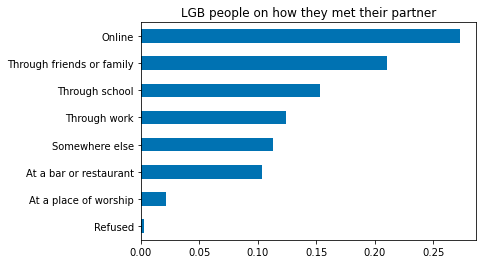

In [10]:
df_lgb = df[(df['ORIENTATIONMOD_W56']=='Bisexual') | (df['ORIENTATIONMOD_W56']=='Gay or lesbian')]
df_lgb['PARTNERMEET_W56'].value_counts(normalize=True).sort_values().plot(kind='barh');
plt.title('LGB people on how they met their partner');
plt.tick_params(axis='both', colors='black');

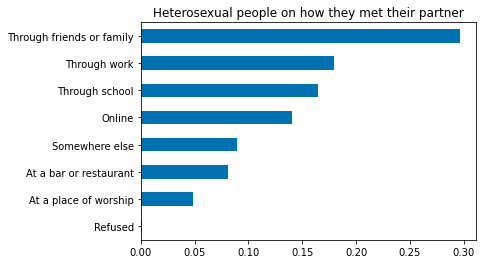

In [11]:
df_hete = df[df['ORIENTATIONMOD_W56']=='Straight, that is, not gay or lesbian']
df_hete['PARTNERMEET_W56'].value_counts(normalize=True).sort_values().plot(kind='barh');
plt.title('Heterosexual people on how they met their partner');
plt.tick_params(axis='both', colors='black');

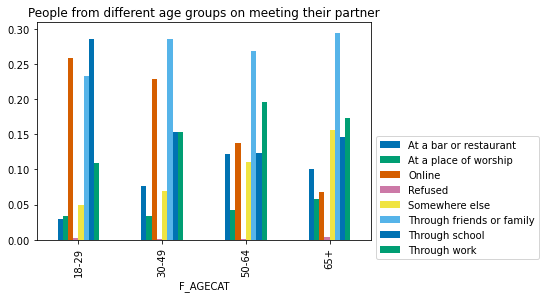

In [12]:
# Remove the answer 'DK/REF' from age group
df_age = df[['F_AGECAT', 'PARTNERMEET_W56']].copy()
df_age.set_index('F_AGECAT', inplace = True)
df_age.drop('DK/REF', inplace=True)
df_age.reset_index(inplace = True)
# Plot
pd.crosstab(df_age['F_AGECAT'],df_age['PARTNERMEET_W56'], normalize='index').plot(kind='bar')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.title('People from different age groups on meeting their partner');

Finding a partner online has become very common. In this study, 1 out of every 6 people met their partner online. When looking at different groups, online dating is the primary way LGB couples meet, and the fourth most popular way heteresexual couples meet. People meeting their partner online decreases with age. However, this might be because online dating took off in the 90's, so older couples didn't have this technology yet. As time passes by, we may see that older couples met their partner online too.

### EDA: Location of where people live

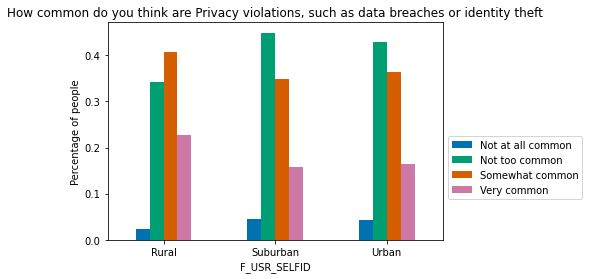

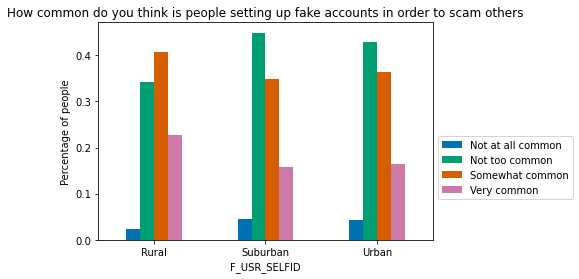

In [13]:
# Replace 'Refused' with null so it doesn't appear in the graph
df['F_USR_SELFID'].replace('Refused',np.NaN, inplace= True)
df['ONPROBLEM.d_W56'].replace('Refused',np.NaN, inplace= True)
df['ONPROBLEM.e_W56'].replace('Refused',np.NaN, inplace= True)
# Plot
pd.crosstab(df['F_USR_SELFID'],df['ONPROBLEM.d_W56'], normalize='index').plot(kind='bar');
plt.ylabel('Percentage of people');
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.title('How common do you think are Privacy violations, such as data breaches or identity theft')
plt.xticks(rotation=0);

pd.crosstab(df['F_USR_SELFID'],df['ONPROBLEM.d_W56'], normalize='index').plot(kind='bar');
plt.ylabel('Percentage of people');
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.title('How common do you think is people setting up fake accounts in order to scam others')
plt.xticks(rotation=0);

Online daters in rural areas indicated more concerns over privacy violations and people setting fake accounts.      

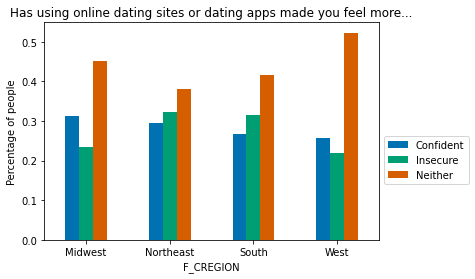

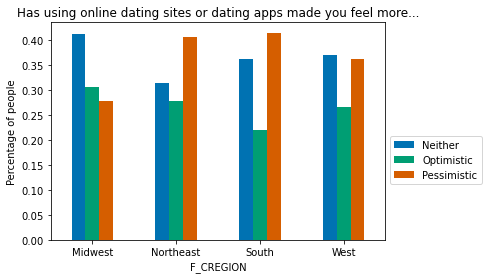

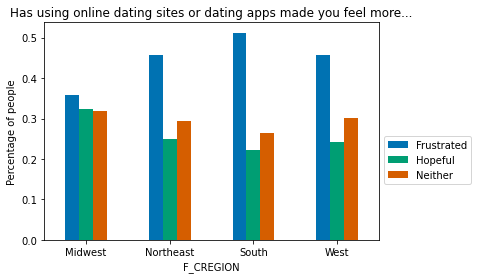

In [14]:
# Replace 'Refused' with null so it doesn't appear in the graph
df['ONFEEL.a_W56'].replace('Refused',np.NaN, inplace= True)
df['ONFEEL.b_W56'].replace('Refused',np.NaN, inplace= True)
df['ONFEEL.c_W56'].replace('Refused',np.NaN, inplace= True)

#Plot
pd.crosstab(df['F_CREGION'],df['ONFEEL.a_W56'], normalize='index').plot(kind='bar');
plt.ylabel('Percentage of people');
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.title('Has using online dating sites or dating apps made you feel more...')
plt.xticks(rotation=0);

pd.crosstab(df['F_CREGION'],df['ONFEEL.b_W56'], normalize='index').plot(kind='bar');
plt.ylabel('Percentage of people');
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.title('Has using online dating sites or dating apps made you feel more...')
plt.xticks(rotation=0);

pd.crosstab(df['F_CREGION'],df['ONFEEL.c_W56'], normalize='index').plot(kind='bar');
plt.ylabel('Percentage of people');
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.title('Has using online dating sites or dating apps made you feel more...')
plt.xticks(rotation=0);

People in the Midwest reported feeling more hopeful, optimistic and confident than people in other regions of the country.

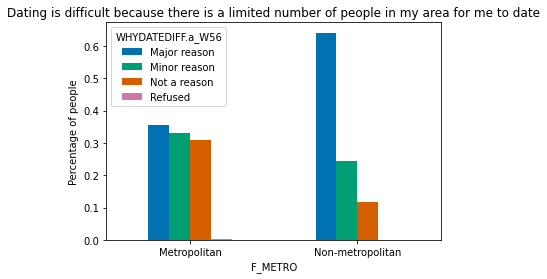

In [15]:
pd.crosstab(df['F_METRO'],df['WHYDATEDIFF.a_W56'], normalize='index').plot(kind='bar');
plt.ylabel('Percentage of people')
plt.title('Dating is difficult because there is a limited number of people in my area for me to date' );
plt.xticks(rotation=0);

People living in non metropolitan areas expressed their difficulty in finding people around them to date. This can impact their experiences with online dating. 

